# Factors Affecting the Quality of Red Wine

## Introduction

The objective of this project is to find the factor could affect the quelity of wine with the 2009 wine quality data from the north of Portugalusing multiple linear regression. We use the Statsmodels and Patsy modules for this task with Python. The dataset was sourced from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Wine+Quality (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis., 2009). This report is organized as follows:

- [Overview](#Overview) section describing the dataset used and the features in this dataset.
- [Data preparation](#Data-preparation) section making sure the data is clean.
- [Data exploration](#Data-exploration) section explores dataset features and their relationships.
- [Statistical Modeling and Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation)
- [Summary and Conclusions](#Summary-and-Conclusions) section summarizing our work and presenting our findings.


## Overview

### Data Source

The data source is from Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez.
There are three datasets `winequality-red.csv` `winequality-white.csv` and `winequality.names`. First two are related to red and white vinho verde wine samples and based on physicochemical tests. The `winequality.names` countains the deatils of the variables.Our project will only use `winequality-red.csv` and `winequality.names` to reach our goal.

Due to privacy and logistic issues, there will not be including grape types,wine brand or wine selling price etc.The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. 
There are 1599 instances from red wine and 4898 instances from white wine. Both of them consist of 11 descriptive features. 

For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].

### Project Objective

The goal is to see if find the main affect using multiple linear regression primarily.

### Target Feature

Our target feature is `quality'.

### Descriptive Features

- **`fixed acidity `** continuous
- **`volatile acidity `**continuous
- **`citric acid `**continuous
- **`residual sugar `**continuous
- **`chlorides `**continuous
- **`free sulfur dioxide`**continuous
- **`total sulfur dioxide`**continuous
- **`density `**continuous
- **`pH `**continuous
- **`sulphates`**continuous
- **`alcohol`**continuous
- **`quality`**continuous



## Data preparation

In [251]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings('ignore')

In [217]:
wine_dataset = pd.read_csv('winequality-red.csv')
wine_dataset.head()
print(f'There are {wine_dataset.shape[0]} rows and {wine_dataset.shape[1]} columns')

There are 1599 rows and 12 columns


In [218]:
# Display randomly selected 10 rows
wine_dataset.sample(10, random_state=999)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1166,9.9,0.540,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
1079,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7
916,5.3,0.715,0.19,1.50,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5
1582,6.1,0.715,0.10,2.60,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
442,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5
401,7.7,0.260,0.30,1.70,0.059,20.0,38.0,0.99490,3.29,0.47,10.8,6
1376,8.2,0.885,0.20,1.40,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5


In [219]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [220]:
print(f"Check duplications: ")
wine_dataset.duplicated()

Check duplications: 


0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [221]:
print(f"Number of duplications ")
wine_dataset.duplicated().sum()

Number of duplications 


240

In [222]:
print(f"Remove duplicated values and new dataset called 'df' ")
winedata = wine_dataset.drop_duplicates(inplace=False)

Remove duplicated values and new dataset called 'df' 


In [223]:
print(f"The shape of the data after droping duplication {winedata.shape}")

The shape of the data after droping duplication (1359, 12)


In [224]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [225]:
winedata.describe(include = np.number).round(3)  # numerical features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000
mean,8.311,0.529,0.272,2.523,0.088,15.893,46.826,0.997,3.310,0.659,10.432,5.623
std,1.737,0.183,0.196,1.352,0.049,10.447,33.409,0.002,0.155,0.171,1.082,0.824
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.430,2.600,0.091,21.000,63.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [226]:
print(f"Number of data from quanlity ")
winedata['quality'].value_counts()

Number of data from quanlity 


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [227]:
print(f"Check if there is any null values.\n")
winedata.isnull().sum()

Check if there is any null values.



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [228]:
print(f"Data types:")
winedata.dtypes

Data types:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Data exploration

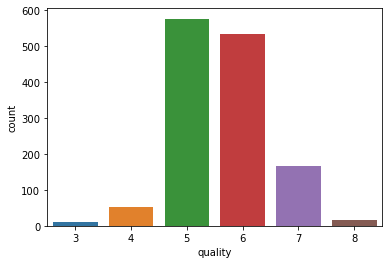

In [229]:
sns.countplot(x= 'quality', data = winedata)

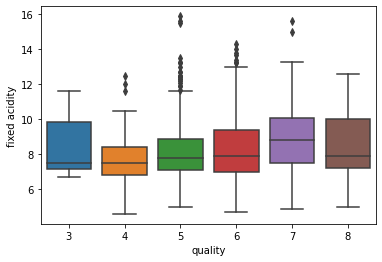

In [230]:
sns.boxplot(winedata['quality'],winedata['fixed acidity'])

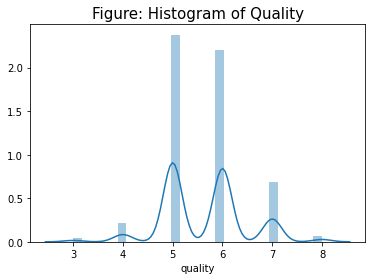

In [231]:
sns.distplot(winedata['quality'], kde = True).set_title('Figure: Histogram of Quality', fontsize = 15)
plt.show();


#### analysis of pH in different type of wine

In [232]:
rate = ['good','bad']
condition = [(winedata['quality'] > 6),
            (winedata['quality'] < 5)]
winedata['rate'] = np.select(condition, rate, default='average')
winedata.rate.value_counts()

average    1112
good        184
bad          63
Name: rate, dtype: int64

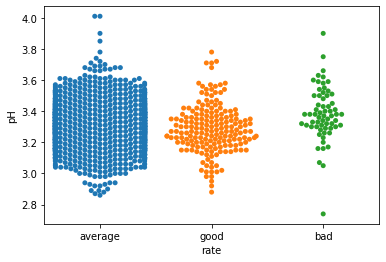

In [233]:
sns.swarmplot(x = "rate", y="pH", data = winedata)

#### Analysis of Residual Sugar and Alcohol in different type of wine

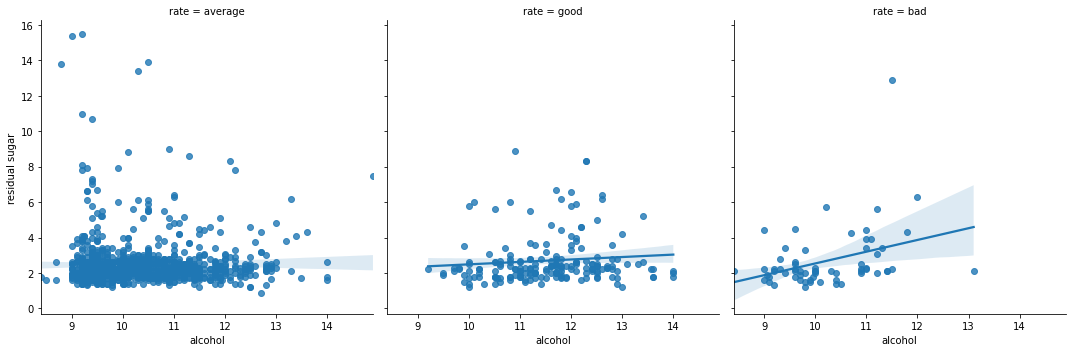

In [234]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rate", data = winedata)

#### Anylization of quality rate and sulfur dioxide

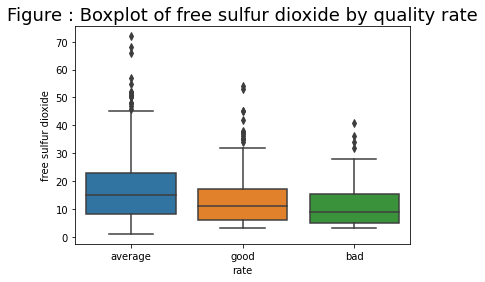

In [235]:
sns.boxplot(winedata['rate'],winedata['free sulfur dioxide']);
plt.title('Figure : Boxplot of free sulfur dioxide by quality rate', fontsize = 18)
plt.show();

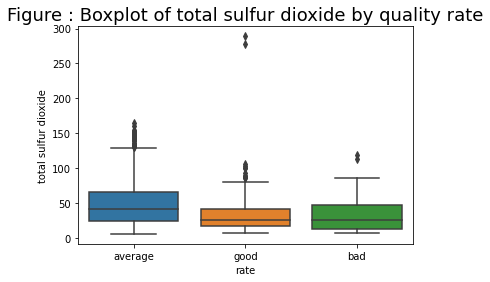

In [236]:
sns.boxplot(winedata['rate'],winedata['total sulfur dioxide']);
plt.title('Figure : Boxplot of total sulfur dioxide by quality rate', fontsize = 18)
plt.show();

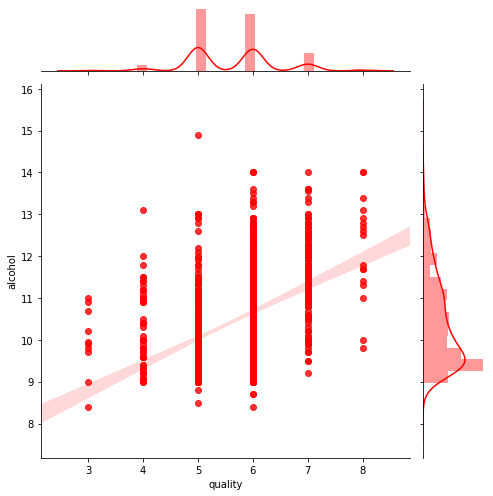

In [237]:
sns.jointplot(data=winedata,x = "quality",y = "alcohol",kind = "reg",truncate=False,color = "r",height = 7)

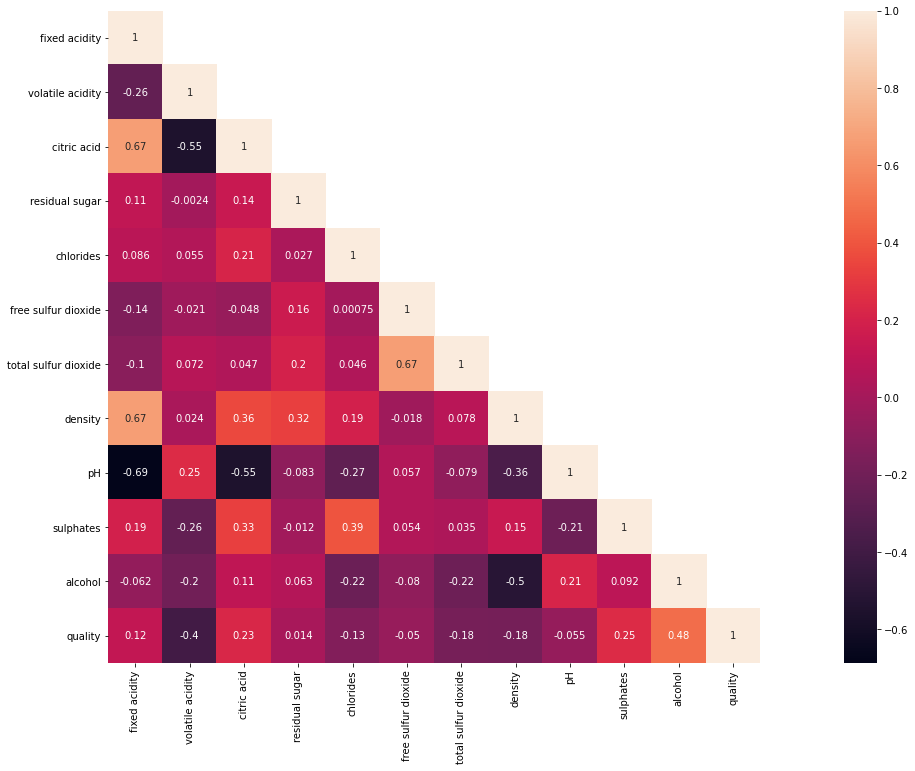

In [238]:
cor_mat= winedata.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Statistical Modeling and Performance Evaluation

In [239]:
quality = (3,5.5,8)
quality_name = [0,1]
winedata['quality'] = pd.cut(winedata['quality'],bins = quality, labels = quality_name)

In [240]:
qualityLabel = LabelEncoder()

In [255]:
winedata['quality'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: int64>

In [243]:
winedata['quality'] = quality_label.fit_transform(winedata['quality'])

In [245]:
x_train,x_test,y_train,y_test=train_test_split(winedata.drop('quality',axis=1),winedata['quality'],test_size=0.25,random_state=42)

In [249]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 12)
(340, 12)
(1019,)
(340,)


In [274]:
models={
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "LinearSVM": LinearSVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB()
}

In [280]:
def model_evaluation (models,X_train,X_test,y_train,y_test):
    np.random.seed(19)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [281]:
model_evaluation(
    models = models,
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test
)

ValueError: could not convert string to float: 'good'

In [278]:
evaluation = pd.DataFrame(model_scores)
evaluation

NameError: name 'model_scores' is not defined

## Summary and Conclusions